<a href="https://colab.research.google.com/github/Jinstronda/Personal-Projects/blob/main/NeuroSciences_CSV_Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSV Project for my Uncle
Project is a CSV scrpy that turns tables of the following format: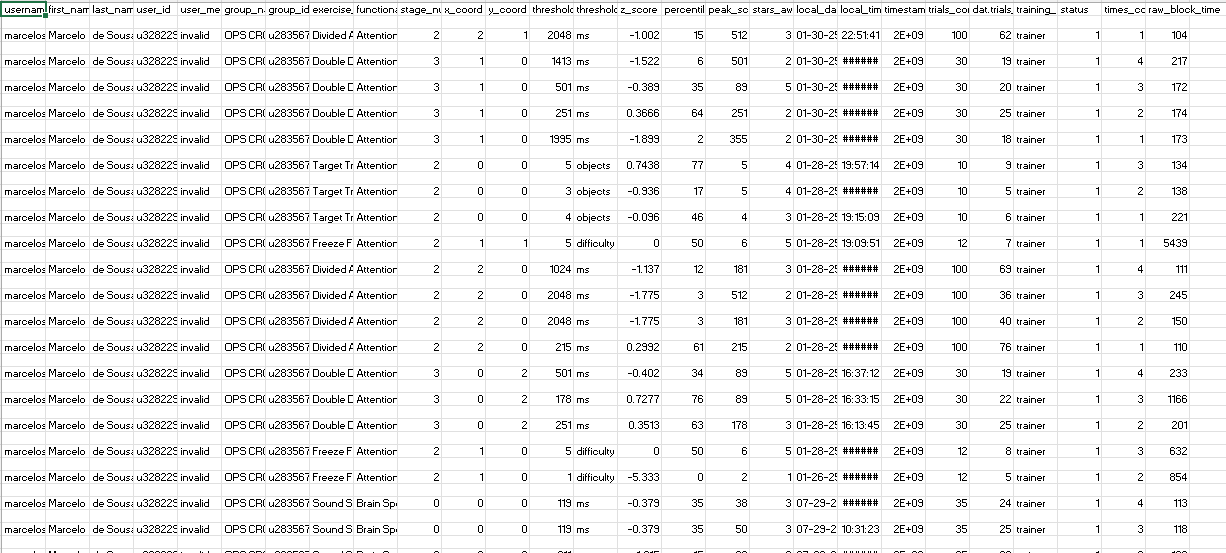

Basically there is a bunch of data that needs consolidation into smaller data with a few paraments, sounds easy to solve with Pandas

In [30]:
import pandas as pd
import numpy as np
!pip install pyinstaller
import tkinter as tk
from google.colab import files

from tkinter import filedialog, messagebox, simpledialog
def load_csv():
    while False:
      file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
      number = simpledialog.askinteger("Input", "Please enter Week Goal:")
    file_path= "/content/sample_data/async_group-u283567-4378-8YHF-blocks-02-09-2025.csv"

    if file_path:
        df = pd.read_csv(file_path)

        process_csv(df,"01-12-25").to_csv("processed_data.csv", index=True)
        files.download("processed_data.csv")



def process_csv(df,start_date):
    user_dict = {}
    df["local_date"] = pd.to_datetime(df["local_date"], format="%m-%d-%y")
    start_date = pd.to_datetime(start_date, format="%m-%d-%y")

    df = df[df["local_date"] >= start_date]
    df["week_start"] = df["local_date"] - pd.to_timedelta((df["local_date"].dt.weekday + 1) % 7, unit="D")


    for _, row in df.iterrows():
        name = row["username"]
        week = row["week_start"].strftime("%m-%d-%Y")


        if name not in user_dict:
            user_dict[name] = {
                "first_name": row["first_name"],
                "last_name": row["last_name"],
                "usr_id": row["user_id"],
                "group_name": row["group_name"],
                "weeks": {},
                "weekly_goal": 18
            }


        if week not in user_dict[name]["weeks"]:
            user_dict[name]["weeks"][week] = {"tasks_completed": 0}


        user_dict[name]["weeks"][week]["tasks_completed"] += 1

    for name in user_dict:
      sum_levels = 0
      for week in user_dict[name]["weeks"]:
        user_dict[name][f"Levels_{week}"] = user_dict[name]["weeks"][week]["tasks_completed"]
        user_dict[name][f"Complete_{week}"] = f'{(user_dict[name]["weeks"][week]["tasks_completed"] / user_dict[name]["weekly_goal"]) * 100:.2f}%'
        sum_levels += user_dict[name]["weeks"][week]["tasks_completed"]
      user_dict[name]["Total_Levels"] = sum_levels
    df = pd.DataFrame.from_dict(user_dict, orient="index")
    df.drop(columns=["weeks"], inplace=True)


    return df
load_csv()
while False:
  root = tk.Tk()
  root.title("CSV File Selector")
  root.geometry("300x200")
  btn = tk.Button(root, text="Select CSV File", command=load_csv)
  btn.pack(pady=20)

  root.mainloop()



<ipython-input-30-cc94f7b8e844>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week_start"] = df["local_date"] - pd.to_timedelta((df["local_date"].dt.weekday + 1) % 7, unit="D")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>